该笔记对应教程为B站`莫烦 Python` UP主出的视频
[莫烦Python](https://www.bilibili.com/video/av17003173)

### 4. 通用学习模式

In [ ]:
import numpy as np
from sklearn import datasets

In [ ]:
from sklearn.cross_validation import train_test_split
#sklearn.cross_validation在1.9版本以后就被弃用了，1.9版本的以后的小伙伴可以用sklearn.model_selection就行了，后面一样的
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
iris=datasets.load_iris()
iris_X=iris.data
iris_y=iris.target

In [ ]:
iris_X[:2,:]

In [ ]:
iris_y

切分

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(iris_X,iris_y,test_size=0.3)

In [ ]:
X_train.shape,X_test.shape

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
knn.predict(X_test)

In [ ]:
y_test

## 5. sklearn的datasets数据库

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
loaded_data=datasets.load_boston()
data_X=loaded_data.data
data_y=loaded_data.target

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(data_X,data_y)

In [ ]:
data_X[:4,:]

In [ ]:
model.predict(data_X[:4,:])

In [ ]:
data_y[:4]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X,y=datasets.make_regression(n_samples=100,n_features=1,n_targets=1,noise=10)
plt.scatter(X,y)

## 6. model 常用属性和功能

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
model.get_params()

In [ ]:
model.score(data_X,data_y)

## 7. normalization 标准化数据

In [ ]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_classification
from sklearn.svm import SVC

In [ ]:
a=np.array([[10,2.7,3.6],[-100, 5, -2],[120, 20, 40]],dtype=np.float64)

In [ ]:
a

In [ ]:
preprocessing.scale(a)

In [ ]:
X, y = make_classification(n_samples=300, n_features=2 , n_redundant=0, n_informative=2,
                           random_state=22, n_clusters_per_class=1, scale=100)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [ ]:
#X=preprocessing.minmax_scale(X,feature_range=(-1,1))  #特征缩放

In [ ]:
X=preprocessing.scale(X)   

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [ ]:
clf=SVC()
clf.fit(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)

## 8. 交叉验证

In [1]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
#sklearn.cross_validation在1.9版本以后就被弃用了，1.9版本的以后的小伙伴可以用sklearn.model_selection就行了，后面一样的
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data
y = iris.target

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# test train split #
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))

0.9736842105263158


In [3]:
# this is cross_val_score #
from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(scores)

[0.96666667 1.         0.93333333 0.96666667 1.        ]


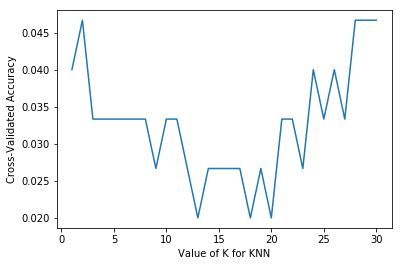

In [7]:
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    loss = -cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error') # for regression
    k_scores.append(loss.mean())
    #scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy') # for classification
    #k_scores.append(scores.mean())
    

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


交叉验证2

In [9]:
from sklearn.model_selection import  learning_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [13]:
digits = load_digits()
X = digits.data
y = digits.target
train_sizes, train_loss, test_loss= learning_curve(
        SVC(gamma=0.001), X, y, cv=10, scoring='neg_mean_squared_error',
        train_sizes=[0.1, 0.25, 0.5, 0.75, 1])
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

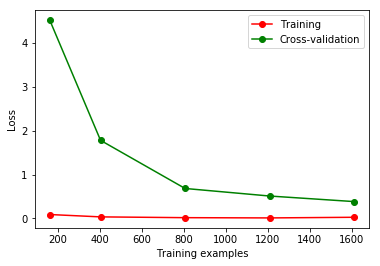

In [14]:
plt.plot(train_sizes, train_loss_mean, 'o-', color="r",
             label="Training")
plt.plot(train_sizes, test_loss_mean, 'o-', color="g",
             label="Cross-validation")

plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

交叉验证3

In [15]:
from sklearn.model_selection import validation_curve

In [16]:
igits = load_digits()
X = digits.data
y = digits.target
param_range = np.logspace(-6, -2.3, 5)
train_loss, test_loss = validation_curve(
        SVC(), X, y, param_name='gamma', param_range=param_range, cv=10,
        scoring='neg_mean_squared_error')
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

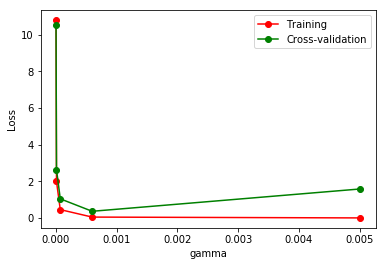

In [18]:
plt.plot(param_range, train_loss_mean, 'o-', color="r",
             label="Training")
plt.plot(param_range, test_loss_mean, 'o-', color="g",
             label="Cross-validation")
plt.xlabel("gamma")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

sk11_save

In [19]:
from sklearn import svm
from sklearn import datasets

In [20]:
clf=svm.SVC()
iris=datasets.load_iris()
X,y=iris.data,iris.target
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
#method 1 pickle
import pickle
#save
with open('./clf.pickle','wb') as f:
    pickle.dump(clf,f)

In [23]:
#restore
with open('./clf.pickle','rb') as f:
    clf2=pickle.load(f)

In [25]:
clf2.predict(X[0:1])

array([0])

In [26]:
#method 2: joblib
from sklearn.externals import joblib
#save
joblib.dump(clf,'./clf.pkl')

['./clf.pkl']

In [27]:
#restore
clf3=joblib.load('./clf.pkl')
clf3.predict(X[0:1])

array([0])